In [3]:
from pandas import read_excel
from printarray import printarray
import numpy as np
from numpy import sqrt, pi, dot, deg2rad, rad2deg
from scipy.linalg import eigh
import math
from matplotlib import pyplot as plt

KDF = read_excel('stiffness_matrix.xlsx')
MDF = read_excel('mass_matrix.xlsx')
CDF = read_excel('damping_matrix.xlsx')
K = KDF.values
M = MDF.values
C = CDF.values

from Meirovitch equation 5-28
$$K \bold{u} = \lambda M \bold{u}$$

In [4]:
def printarray(arr, fmt):
    """打印一维数组，并应用指定的格式"""
    for element in arr:
        print(('{:' + fmt + '}  ').format(element), end="")
    print('')

In [5]:
lam, u = eigh(K, M)
omega = sqrt(lam)
# natural frequency in Hz
f_n = omega / (2 * math.pi)
print('\n## Natural circular Frequencies, omega_n) (rad/s) ##')
print('----------------------------------------------------')
for i, f in enumerate(omega):
    print(f'Mode {i+1} (omega_{i+1}): {f:.6f} rad/s')
print('----------------------------------------------------')

#-------------------------------

print('\n## 固有频率 (Natural Frequencies, f_n) (Hz) ##')
print('----------------------------------------------------')
for i, f in enumerate(f_n):
    print(f'Mode {i+1} (f_{i+1}): {f:.6f} Hz')
print('----------------------------------------------------')


# (Mode Shapes)

print('\n## 对应的振型 (Mode Shapes, phi) ##')
# u 的每一列 u[:, i] 是对应的振型 phi_i
for i in range(u.shape[1]):
    print(f'\n--- 振型 Mode {i+1} (phi_{i+1}) ---')
    # 振型是 u 的第 i 列
    printarray(u[:, i], '.8f')


## Natural circular Frequencies, omega_n) (rad/s) ##
----------------------------------------------------
Mode 1 (omega_1): 2.514587 rad/s
Mode 2 (omega_2): 8.199478 rad/s
Mode 3 (omega_3): 18.992334 rad/s
Mode 4 (omega_4): 27.148632 rad/s
Mode 5 (omega_5): 89.367458 rad/s
Mode 6 (omega_6): 93.142824 rad/s
Mode 7 (omega_7): 124.795116 rad/s
Mode 8 (omega_8): 232.417926 rad/s
----------------------------------------------------

## 固有频率 (Natural Frequencies, f_n) (Hz) ##
----------------------------------------------------
Mode 1 (f_1): 0.400209 Hz
Mode 2 (f_2): 1.304987 Hz
Mode 3 (f_3): 3.022724 Hz
Mode 4 (f_4): 4.320839 Hz
Mode 5 (f_5): 14.223273 Hz
Mode 6 (f_6): 14.824141 Hz
Mode 7 (f_7): 19.861760 Hz
Mode 8 (f_8): 36.990462 Hz
----------------------------------------------------

## 对应的振型 (Mode Shapes, phi) ##

--- 振型 Mode 1 (phi_1) ---
-0.10736776  -0.14788080  -0.07112530  -0.02169443  -0.05474769  -0.01886972  -0.13620952  -0.04802591  

--- 振型 Mode 2 (phi_2) ---
0.10185538  0.0

In [6]:
print('\n--- 任务 2: 计算最低固有频率对应的比值 ---')

# 最低固有频率对应 Mode 1，即 v 的第 0 列 (索引从 0 开始)
lowest_mode_vector = u[:, 0]
highest_mode_vector = u[:, -1]
display(lowest_mode_vector)
# 第一个位移 (振型向量的第一个元素)
first_displacement = lowest_mode_vector[0]

# 最后一个位移 (振型向量的第八个元素，索引为 7)
last_displacement = lowest_mode_vector[7]

# 计算第一个位移与最后一个位移的比值（包括符号）
ratio = first_displacement / last_displacement

print(f'\n最低固有频率 (f_1) 对应的振型向量:')
printarray(lowest_mode_vector, '.8f')
print(f'第一个位移 (phi_1): {first_displacement:.8f}')
print(f'最后一个位移 (phi_8): {last_displacement:.8f}')
print(f'\n第一个位移与最后一个位移的比值 (phi_1 / phi_8): {ratio:.8f}')

print('\n----------------------------------------------------')
dot_product = dot(lowest_mode_vector,highest_mode_vector)
display(dot_product)


--- 任务 2: 计算最低固有频率对应的比值 ---


array([-0.10736776, -0.1478808 , -0.0711253 , -0.02169443, -0.05474769,
       -0.01886972, -0.13620952, -0.04802591])


最低固有频率 (f_1) 对应的振型向量:
-0.10736776  -0.14788080  -0.07112530  -0.02169443  -0.05474769  -0.01886972  -0.13620952  -0.04802591  
第一个位移 (phi_1): -0.10736776
最后一个位移 (phi_8): -0.04802591

第一个位移与最后一个位移的比值 (phi_1 / phi_8): 2.23562164

----------------------------------------------------


np.float64(0.0041235010803160055)

---
## Homework 6
From textbook Meirovitch equation 7.198, frequency response matrix is expressed as:
$$Z^{-1} (i \alpha) = G(i \alpha)$$
 The viscously damped n-digree-of-fredom systerm can be written as matrix form:
 $$M \bold{\ddot q}(t) + C \bold {\dot q }(t) +K\bold{q}(t) = \bold{Q}(t)$$
where 
$$Z(i \alpha) = -\alpha ^2 \bold{M} + i\alpha C +K $$


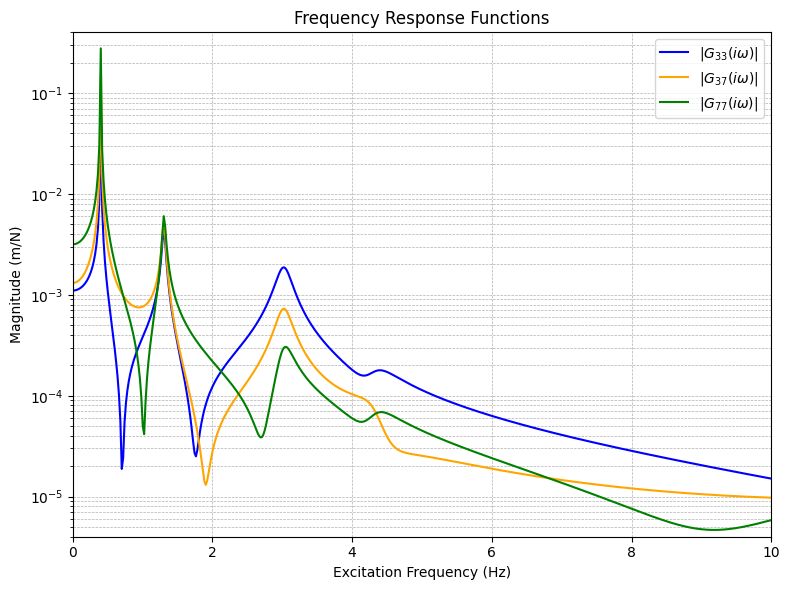


--- 峰-峰位移计算结果 ---
激励频率 omega: 6.2832 rad/s
FRF 幅值 |G[3, 7]|: 7.62907366e-04 m/N
位移峰-峰值 X_pp (mm): 6.1033

--- 峰-峰位移计算结果 ---
激励频率 omega: 17.9071 rad/s
FRF 幅值 |G[3, 3]|: 1.04437579e-03 m/N
位移峰-峰值 X_pp_2 (mm): 16.7100


In [10]:
# ======================================================
# HW6: Frequency Response Functions (FRFs)
# ======================================================

# Frequency range (Hz)
f = np.linspace(0.0, 10.0, 500)
omega_exc = 2 * pi * f  # rad/s

# Storage for FRFs
G33 = np.zeros(len(f), dtype=complex)
G37 = np.zeros(len(f), dtype=complex)
G77 = np.zeros(len(f), dtype=complex)

# Loop over excitation frequencies
for i, w in enumerate(omega_exc):
    # Dynamic stiffness matrix
    Z = - (w**2) * M + 1j * w * C + K
    
    # Frequency response function matrix
    G = np.linalg.inv(Z)
    # Extract required FRFs (note Python indexing!)
    G33[i] = G[2, 2]   # DOF 3 due to DOF 3
    G37[i] = G[2, 6]   # DOF 3 due to DOF 7
    G77[i] = G[6, 6]   # DOF 7 due to DOF 7

# ======================================================
# Plotting
# ======================================================
plt.figure(figsize=(8, 6))

plt.semilogy(f, np.abs(G33), 'b', label=r'$|G_{33}(i\omega)|$')
plt.semilogy(f, np.abs(G37), 'orange', label=r'$|G_{37}(i\omega)|$')
plt.semilogy(f, np.abs(G77), 'green', label=r'$|G_{77}(i\omega)|$')

plt.xlabel('Excitation Frequency (Hz)')
plt.ylabel('Magnitude (m/N)')
plt.title('Frequency Response Functions')

plt.xlim(0, 10)
plt.ylim(4.0e-6, 4.0e-1)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

f_1 = 1.0 # Hz
f_2 = 2.85
F_pp = 8.0 # N (Peak-to-peak force)
F_peak = F_pp / 2.0 # N (Force amplitude)
F_pp_2 = 16.0 # N (Peak-to-peak force)
F_peak_2 = F_pp_2 /2
omega_1 = 2 * pi * f_1
omega_2 = 2 * pi * f_2




# 2. 构建阻抗矩阵 Z
Z = - (omega_1**2) * M + 1j * omega_1 * C + K
Z_2 = - (omega_2**2) * M + 1j * omega_2 * C + K

# 3. 计算 FRF 矩阵 G = Z^-1
G = np.linalg.inv(Z)
G_2 = np.linalg.inv(Z_2)
# 4. 提取所需的 FRF 元素 G[3, 7] (Python 索引 [2, 6])
G_37 = G[2, 6]
Magnitude_37 = np.abs(G_37) # m/N

# 5. 计算位移响应 (m)
X_peak_m = Magnitude_37 * F_peak
X_pp_m = 2.0 * X_peak_m

# 6. 转换单位到 mm
X_pp_mm = X_pp_m * 1000.0

# 7. 打印并格式化结果
print(f"\n--- 峰-峰位移计算结果 ---")
print(f"激励频率 omega: {omega_1:.4f} rad/s")
print(f"FRF 幅值 |G[3, 7]|: {Magnitude_37:.8e} m/N")
print(f"位移峰-峰值 X_pp (mm): {X_pp_mm:.4f}") # 答案要求 4 位数字

G_2_33 = G_2[2,2]
Magnitude_33 = np.abs(G_2_33)
X_peak_m_2 = Magnitude_33 * F_peak_2
X_pp_m_2 = 2.0 * X_peak_m_2
X_pp_mm_2 = X_pp_m_2 * 1000.0
print(f"\n--- 峰-峰位移计算结果 ---")
print(f"激励频率 omega: {omega_2:.4f} rad/s")
print(f"FRF 幅值 |G[3, 3]|: {Magnitude_33:.8e} m/N")
print(f"位移峰-峰值 X_pp_2 (mm): {X_pp_mm_2:.4f}") # 答案要求 4 位数字

In [11]:
## calculate lag angle
f = 2.85 #hz
omega = 2 * pi * f
angle_rad = np.angle(G_2_33)
angle_deg = rad2deg(angle_rad)
phase_lag_deg = np.abs(angle_deg)

# 8. 打印并格式化结果
print(f"\n--- 相位滞后计算结果 ---")
print(f"激励频率 omega: {omega:.4f} rad/s")
print(f"FRF 元素 G[3, 3]: {G_2_33:.4e}")
print(f"相位角 (度): {angle_deg:.4f} degrees")
print(f"相位滞后 (度, 绝对值): {phase_lag_deg:.4f}") # 答案要求 4 位数字


--- 相位滞后计算结果 ---
激励频率 omega: 17.9071 rad/s
FRF 元素 G[3, 3]: 8.6459e-04-5.8584e-04j
相位角 (度): -34.1212 degrees
相位滞后 (度, 绝对值): 34.1212
